In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import notebook
%matplotlib inline

In [28]:
import networkx as nx 

# Анализ данных

In [29]:
#G = nx.read_edgelist('socfb-MIT.mtx')
G = nx.read_edgelist('socfb-Caltech36.txt', delimiter=' ', nodetype=int)

print('Nodes:',G.number_of_nodes())
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G))


Nodes: 769
Edges: 16656
Density: 0.05640442132639792


### Основные структурные свойства, устойчивость сети


#### Задание 1:

In [30]:
c = (nx.clustering(G))

Text(0.5, 1.0, 'Распределение коэффициента кластеризации')

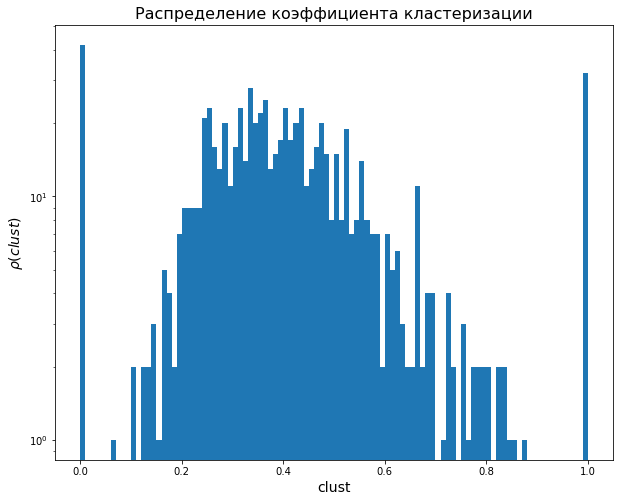

In [31]:
plt.figure(figsize = (10,8))
a = plt.hist(c.values(),log=True, bins = 100)
plt.xlabel('clust', fontsize=14)
plt.ylabel(r'$\rho(clust)$', fontsize=14)
plt.title('Распределение коэффициента кластеризации',fontsize = 16)

In [32]:
from collections import Counter
res = Counter(nx.clustering(G).values())
res.most_common(2)



[(0, 42), (1.0, 32)]

Ответ: Коэффициент кластеризации преимещуственно принимает значение 0 и 1. Значение 1 встрачается 32 раз, значение 0 - 42 раз.

#### Задание 2:

In [33]:
degrees = [d for n, d in G.degree()]
gdict = dict(G.degree())

degrees2 = []
for i in gdict.keys():
    degrees2.append(gdict[i])
    
c2 = []
for i in c.keys():
    c2.append(c[i])
X = c2
Y = degrees2

kP = np.corrcoef(X, Y)
kP

array([[ 1.        , -0.36899931],
       [-0.36899931,  1.        ]])

Ответ: Коэффициент корреляции Пирсона степени и коэффициента кластеризации вершин = -0.36899931

#### Задание 3:

In [34]:
print(nx.is_connected(G))

False


Сеть является несвязной

762
0.9908972691807543
4


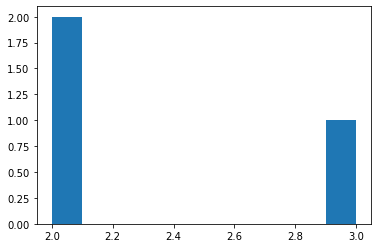

In [35]:
LCG_nodes=max(nx.connected_components(G), key=len) # максимальная компонента
LCG=G.subgraph(LCG_nodes) # создаем подграф на списке вершин максимальной компоненты
print(len(LCG))
print(len(LCG)/len(G))
SCC = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(len(SCC))
SCC.remove(762)
c=plt.hist(SCC)

Ответ: Количество компонент связности равно 4. Размер наибольшей компоненты - 762.

#### Задание 4

In [36]:
epsilon=0.05
n=int(epsilon*LCG.number_of_edges()) 
LCH=LCG.copy()
loc=[]
loc.append(nx.local_efficiency(LCH))
for i in notebook.tqdm(range(10)):
    edges_removed=[list(LCH.edges)[k] for k in np.random.choice(LCH.number_of_edges(),n, replace=False)]
    LCH.remove_edges_from(edges_removed)
    loc.append(nx.local_efficiency(LCH))

Text(0, 0.5, 'local_efficiency')

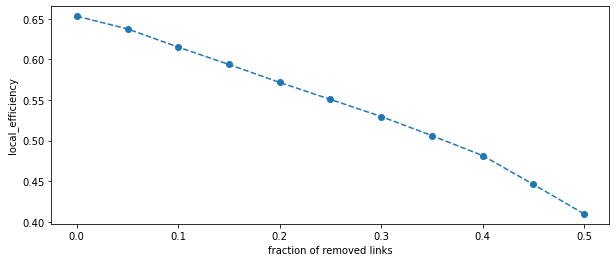

In [40]:
plt.figure(figsize=(10,4))
plt.plot(np.linspace(0,10*epsilon,11),loc,'o--')
plt.xlabel('fraction of removed links')
plt.ylabel('local_efficiency')

Ответ: локальная эффективность уменьшается линейно при удалении ребер

### Распределение степеней и корреляция 

#### Задание 1:

Text(0, 0.5, '$\\rho(k)$')

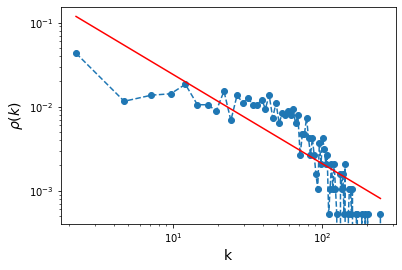

In [42]:
degrees=[d for n, d in G.degree()]
h,x=np.histogram(degrees,bins=100,density=True) 

x_=(x[:-1]+x[1:])/2
z = np.polyfit(np.log(x_[np.nonzero(h)]), np.log(h[np.nonzero(h)]), 1) 
f= np.poly1d(z)
plt.plot(x_,h,'o--')
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

[-1.89573182  5.28260445]


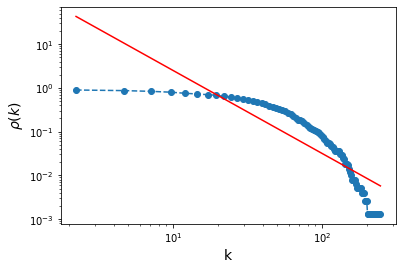

In [43]:
dx=x_[1]-x_[0]
ccdf=1-(np.cumsum(h)*dx)
plt.plot(x_[:-1],ccdf[:-1],'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)


z = np.polyfit(np.log(x_[:-10]), np.log(ccdf[:-10]), 1)
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
print(z)

Calculating best minimal value for power law fit


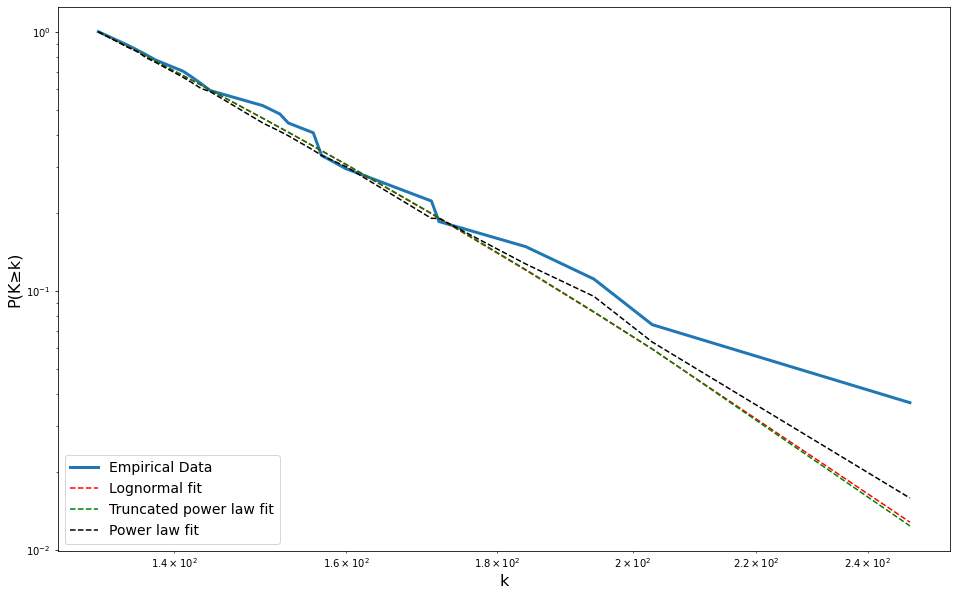

In [47]:
import powerlaw
fig, ax = plt.subplots(figsize = (16,10))
fit = powerlaw.Fit(degrees, discrete=True)
fit.distribution_compare('lognormal', 'truncated_power_law')
fit.plot_ccdf(ax=ax, linewidth=3, label='Empirical Data')
fit.lognormal.plot_ccdf(ax=ax, color='r', linestyle='--', label='Lognormal fit')
fit.truncated_power_law.plot_ccdf(ax=ax, color='g', linestyle='--', label='Truncated power law fit')
fit.distribution_compare('power_law', 'lognormal')
fit.power_law.plot_ccdf(ax=ax, color='k', linestyle='--', label='Power law fit')
ax.set_ylabel(u"P(K≥k)",fontsize=16)
ax.set_xlabel("k",fontsize=16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=3,fontsize=14)

Ответ: Распределение степеней не подчиняется степенному закону

#### Задание 2:

In [52]:
r = nx.degree_assortativity_coefficient(G)
r

-0.06527295119482344

Ответ: Кофффициент ассортативности = -0.06527295119482344

#### Задание 3:

43.3185955786736
Max degree: 248
Min degree: 1


<ipython-input-194-cf4410818763>:26: RuntimeWarning: invalid value encountered in double_scalars
  return s[k]/summ[k]


Text(0, 0.5, 'corr')

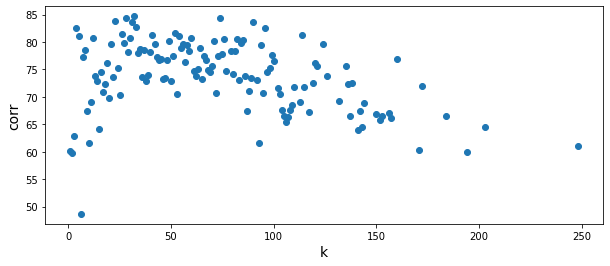

In [194]:
from scipy.stats import pearsonr as corr_coef
left_degree=[G.degree[P] for (P,Q) in G.edges()]
right_degree=[G.degree[Q] for (P,Q) in G.edges()]

l=left_degree+right_degree 
r=right_degree+left_degree
nn_degrees=nx.average_neighbor_degree(G).values()
degrees=[d for n, d in G.degree()]
print(np.mean(degrees))
print('Max degree:', np.max(degrees))
print('Min degree:', np.min(degrees)) 


def cor(k):
    summ = np.zeros(249)
    s = np.zeros(249)
    for i in range(len(degrees)):
        for j in range(len(summ)):
            if (degrees[i]==j):
                summ[j]+=1
    n = list(nn_degrees)
    for i in range(len(degrees)):
        for j in range(len(summ)):
            if (degrees[i]==j):
                s[j]+= n[i]
    return s[k]/summ[k]

k = np.linspace(1,248,248)
corr = []
for i in range(1,249):
    corr.append(cor(i))

plt.figure(figsize=(10,4))
plt.scatter(k, corr)
plt.xlabel('k', fontsize=14)
plt.ylabel('corr', fontsize=14)

Ответ: Построена функция корреляции степеней cor(k)

#### Задание 4:

Text(0, 0.5, 'coef Rich-Club')

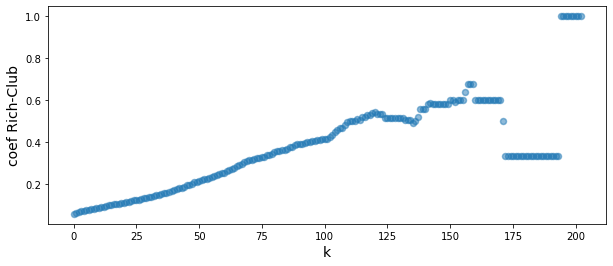

In [173]:
v = nx.rich_club_coefficient(G, normalized=False, seed=42)
x = list(v.keys())
y = list(v.values())
plt.figure(figsize=(10,4))
plt.scatter(x, y, linewidth=1.5, alpha=0.5)
plt.xlabel('k', fontsize=14)
plt.ylabel('coef Rich-Club', fontsize=14)

Ответ: Построена зависимость коэффициента Rich Club от k

#### Задание 5:

Text(0, 0.5, 'K-core')

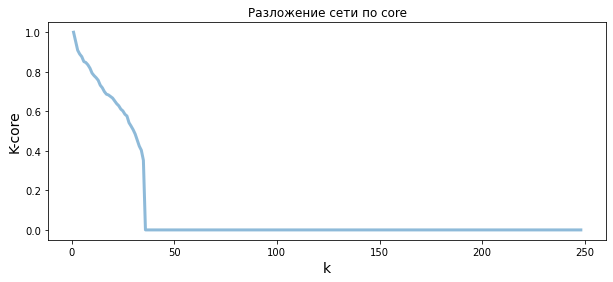

In [213]:
countkg =[]
for i in range(1,249):
    kG = nx.k_core(G,k=i)
    countkg.append(len(kG.nodes())/G.number_of_nodes())
countkg
k = np.linspace(1,248,248)
plt.figure(figsize=(10,4))
plt.plot(k, countkg, linewidth=3, alpha=0.5)
plt.xlabel('k', fontsize=14)
plt.ylabel('K-core', fontsize=14)

Ответ: Написана функция разложения сети по core

### Моделирование и рандомизация 


#### Задание 1:

Number of edges = 16561
Average degree = 43.07152145643693


43.3185955786736

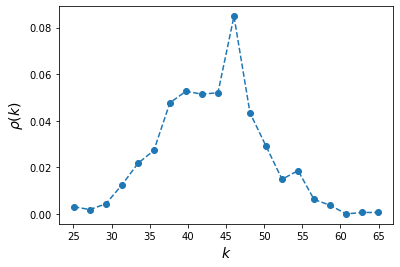

In [226]:
er = nx.erdos_renyi_graph(G.number_of_nodes(), nx.density(G))

print ('Number of edges =',er.number_of_edges())
degrees=[d for node, d in er.degree()]
print ('Average degree =',np.mean(degrees))

h,x=np.histogram(degrees,bins=20,density=True) 

x_=(x[:-1]+x[1:])/2
plt.plot(x_,h,'o--')
plt.xlabel(r'$ k$', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

degrees=[d for n, d in G.degree()]
np.mean(degrees)

Number of edges = 16434
Average degree = 42.74122236671001


Text(0, 0.5, '$\\rho(k)$')

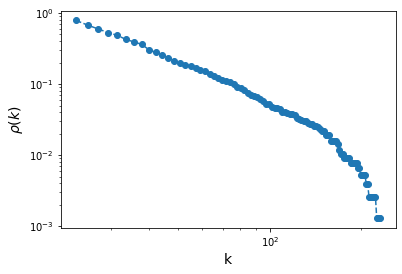

In [232]:
ba=nx.barabasi_albert_graph(G.number_of_nodes(), 22)

print ('Number of edges =',ba.number_of_edges())
degrees=[d for node, d in ba.degree()]
print ('Average degree =',np.mean(degrees))

h,x=np.histogram(degrees,bins=100,density=True) 

x_=(x[:-1]+x[1:])/2 

dx=x_[1]-x_[0]
#plt.plot(x_[:-1],h[:-1],'o--')
ccdf=1-(np.cumsum(h[:-1])*dx)
plt.plot(x_[:-1],ccdf,'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [230]:
degrees=[d for n, d in G.degree()]
print(np.mean(degrees))
print(G.number_of_edges())

43.3185955786736
16656


Ответ: модель Эрдеша-Реньи показывает лучшие результаты в обоих случаях

#### Задание 2:

In [251]:
degrees=[d for node, d in G.degree()]

GC=nx.configuration_model(degrees,seed=10)
print('Nodes:',GC.number_of_nodes()) 
print('Edges:',GC.number_of_edges())
print('Density:',nx.density(GC)) 
print('Selfloops:',nx.number_of_selfloops(GC)) 
print('Multiedges:', nx.is_multigraphical(GC))


Nodes: 769
Edges: 16656
Density: 0.05640442132639792
Selfloops: 35
Multiedges: True


Ответ: Данная модель лучше справляется с описанием свойств. Selfloops: 35,
Multiedges: True

#### Задание 3:

In [265]:
def func(G,f):
    L=list(G.edges())
    for l in range(0, 16656*f):
        i,j = np.random.choice(len(L), 2, replace=False)
        (A,B)=L[i]
        (C,D)=L[j]
        if((not G.has_edge(A,D)) and  (not G.has_edge(B,C)) and (A!=D) and (B!=C)):
            G.remove_edge(A,B)
            G.remove_edge(C,D)
            G.add_edge(A,D)
            G.add_edge(B,C)
            L[i]=(A,D)
            L[j]=(B,C)
    return nx.average_clustering(G)


Ответ: Построена функция

#### Задание 4:

In [266]:
fun = []
ff = np.linspace(1,10,10)
for i in range(1,11):
    fun.append(func(G,i))

Text(0, 0.5, 'Average clustering')

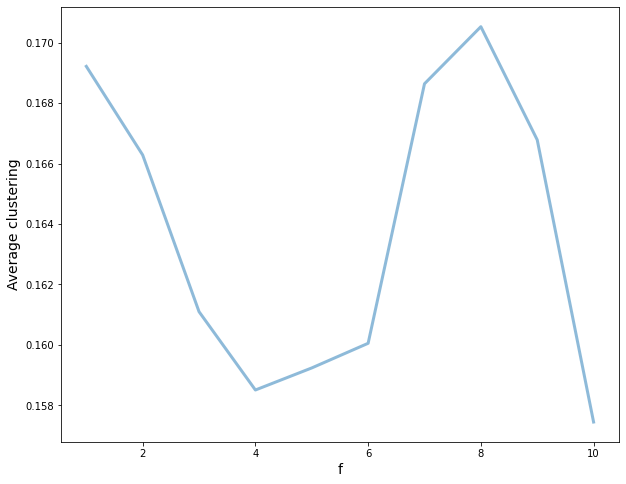

In [267]:
plt.figure(figsize=(10,8))
plt.plot(ff, fun, linewidth=3, alpha=0.5)
plt.xlabel('f', fontsize=14)
plt.ylabel('Average clustering', fontsize=14)

Ответ: Представлена зависимость усредненной кластеризации от числа рандомизации. Остальные приведенные характеристики выше не изменялись при разных f